In [1]:
import torch
import os
import numpy as np
import pandas as pd
import shutil

from tqdm import tqdm
from options import SamplingOptions
from torch.utils.data import DataLoader
from y_sample_dataset import SamplingDataset
from model import CHARACTERModel
from PIL import Image
from google.cloud import storage

In [2]:
opt = SamplingOptions()

In [3]:
dataset = SamplingDataset(opt)
loader = DataLoader(dataset, batch_size=opt.batch_size, shuffle=False, drop_last=False, num_workers=int(opt.num_threads))

In [4]:
model = CHARACTERModel(opt=opt)
model.load_model()

Param count for Ds initialized parameters: 19541696
Param count for Ds initialized parameters: 20591296
Param count for Ds initialized parameters: 27289027


In [5]:
# outer loop for different epochs; we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>
model.eval() 
for i, data in enumerate(loader):  # inner loop within one epoch         
    model.set_input(data)         # unpack data from dataset and apply preprocessing
    model.forward()
    generated = model.img_print2write
    break

In [7]:
def tensor2im(input_image, imtype=np.uint8):
    """"Converts a Tensor array into a numpy image array.

    Parameters:
        input_image (tensor) --  the input image tensor array
        imtype (type)        --  the desired type of the converted numpy array
    """
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()  # convert it into a numpy array
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0  # post-processing: tranpose and scaling
    else:  # if it is a numpy array, do nothing
        image_numpy = input_image
    return image_numpy.astype(imtype)

In [24]:
a = tensor2im(generated[[8]])

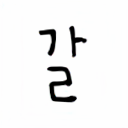

In [25]:
Image.fromarray(a)